In [10]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from data import util
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from evolutionary.nsga import NSGA

In [9]:
# Create a SQLite database connection
db_conn = sqlite3.connect("PairsTradingData.db")

# Instantiate the OHLCV class with the database connection
ohlc_reader = util.OHLCV(db_conn)

# Call the load method with the required parameters
assets = ["LINKUSDT", "MATICUSDT"]
exchanges = ["binance" for _ in range(len(assets))]
since_date = "2024-01-01 00:01:00"

data_frames = ohlc_reader.load(assets, exchanges, since_date)

functions = [lambda x: np.linalg.norm(x[0]*data_frames[0]["close"] - x[1]*data_frames[0]["close"]), lambda x: -np.std(x[0]*data_frames[0]["close"] - x[1]*data_frames[0]["close"])]



[2, 1]


close    1605.547843
dtype: float64


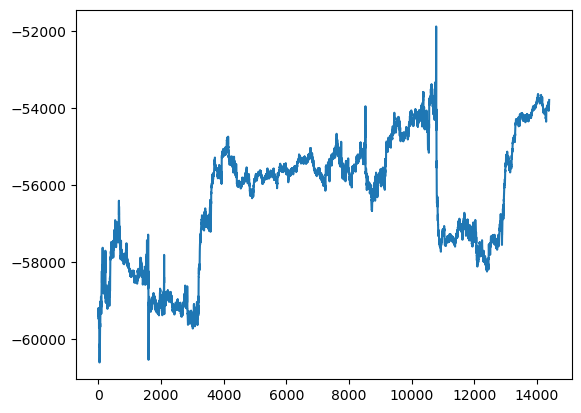

In [19]:
test = pd.DataFrame()

test['close'] = -1.20236881  *data_frames[0]["close"] -  1.27315312*data_frames[1]["close"]

test = test.reset_index(drop=True)

print(np.std(test))
# print(adfuller(test)[1])

plt.plot(test['close'])

def plot(functions):
    nsga = NSGA(functions)
    population = nsga.generate_population()
    print("Generation 0")
    for i in range(20):
        population = nsga.evolve(population)
        print("Generation ", i+1)
        print("Average norm: ", nsga.avg_objective(population, 0))
        print("Average standard deviation: ",
              nsga.avg_objective(population, 1))

    print(population)


graph = go.Figure()

graph.update_layout(title='Linear combo',
                     xaxis_title='Date',
                     yaxis_title='Price')
graph.add_trace(go.Scatter(x=test.index, y=test['close'], mode='lines', name='Close'))